# sel test

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [8]:
import os

In [40]:
from src.constants import KAT_EX_PATH, NO_BBOX, NEW_ORLEANS

In [2]:
from src.preprocessing.sel import trim_tri

In [3]:
?trim_tri

In [4]:
from adcircpy.outputs import Fort63

In [9]:
f63 = Fort63(os.path.join(KAT_EX_PATH, "fort.63.nc"))

In [10]:
f63.y

array([39.31352665, 39.30541742, 45.69340656, ..., 15.86675545,
       15.84477831, 15.75183811])

In [11]:
trim_tri

<function src.preprocessing.sel.trim_tri(x: numpy.ndarray, y: numpy.ndarray, tri: numpy.ndarray, bbox: sithom.place.BoundingBox, z: Union[numpy.ndarray, NoneType] = None) -> Union[Tuple[numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray, numpy.ndarray]]>

In [19]:
f63._ptr["zeta"][:].shape

(252, 8303)

In [44]:
x, y, tri, z = trim_tri(f63.x, f63.y, f63.triangles, NEW_ORLEANS.bbox(3), f63._ptr["zeta"][:])

In [46]:
import xarray as xr

In [ ]:
xr.Dataset()

In [21]:
f63.triangles

array([[5188, 5433, 5189],
       [7844, 7776, 7843],
       [4550, 4805, 4806],
       ...,
       [ 996, 1078, 1077],
       [ 995, 1077, 1076],
       [1078, 1167, 1077]], dtype=int32)

In [48]:
import matplotlib.pyplot as plt
from sithom.plot import plot_defaults

In [78]:
from src.constants import FIGURE_PATH
plot_defaults()
vmin=-3.75
vmax=3.75
levels = np.linspace(vmin, vmax, num=400)
figs_path = os.path.join(FIGURE_PATH, "katrina_hit")
# os.mkdir(figs_path)


def make_part(num=125):
    plt.tricontourf(x, y, tri, z.data[num], vmin=vmin, vmax=vmax, levels=levels, cmap="cmo.balance")
    plt.colorbar(label="Height [m]")
    plt.xlabel("Longitude [$^{\circ}$E]")
    plt.ylabel("Latitude [$^{\circ}$N]")
    plt.savefig(os.path.join(figs_path, str(num) + ".png"))
    plt.clf()

#make_part(200)
#plt.show()
#make_part(206)
#plt.show()
for i in range(z.shape[0]):
    make_part(i)

<Figure size 826.772x510.973 with 0 Axes>

In [79]:
fig_paths = [os.path.join(figs_path, str(num) + ".png") for num in range(z.shape[0])]
import imageio
ims = [imageio.imread(f) for f in fig_paths]
imageio.mimwrite(os.path.join(FIGURE_PATH,"katrina_hit.gif"), ims)

/var/folders/q5/n7rv_91d6b58cbb5xkzlsc4c0000gn/T/ipykernel_79592/1050790239.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ims = [imageio.imread(f) for f in fig_paths]


In [84]:
import datetime
start = datetime.datetime(year=2005, month=8, day=19, hour=5)
time_step = datetime.timedelta(hours=1, minutes=20)
times = [start + i * time_step for i in range(z.shape[0])]
ds = xr.Dataset(data_vars={"zeta": (["time", "point"], z.data),
                      "mesh": (["triangle", "vertex"], tri)},
           coords={"lon": (["point"], x),
                   "lat": (["point"], y),
                   "time": (["time"], times)})
ds

<xarray.Dataset>
Dimensions:  (time: 252, point: 339, triangle: 558, vertex: 3)
Coordinates:
    lon      (point) float64 -90.2 -90.32 -90.35 -90.26 ... -87.1 -87.61 -88.01
    lat      (point) float64 30.03 30.12 30.25 30.35 ... 27.11 27.52 27.37 27.08
  * time     (time) datetime64[ns] 2005-08-19T05:00:00 ... 2005-09-02T03:40:00
Dimensions without coordinates: point, triangle, vertex
Data variables:
    zeta     (time, point) float64 -2.484e-05 -1.522e-05 ... -0.199 -0.2047
    mesh     (triangle, vertex) int64 42 66 41 245 256 ... 302 284 286 304 302

In [43]:
NEW_ORLEANS.bbox(3)

[('Latitude bounds', [26.9511, 32.9511], 'degrees_north'), ('Longitude bounds', [-93.0715, -87.0715], 'degrees_east'), 'Bounding Box around point: New Orleans Point']

In [54]:
z.min(), z.max()

(-0.9199999999999999, 3.6469334306501096)

In [61]:
vmin=-3.75
vmax=3.75
levels = np.linspace(vmin, vmax, num=400)
import numpy as np

In [77]:
z.data

array([[-2.48405040e-05, -1.52187881e-05, -4.26740139e-06, ...,
         1.64582711e-04,  1.05632111e-04,  5.77992435e-05],
       [-1.28604553e-05, -1.01544597e-04, -1.19852083e-04, ...,
         3.84890470e-04,  2.19018973e-04,  1.59168814e-04],
       [ 8.20444799e-05, -1.44906312e-04, -2.97147353e-04, ...,
        -1.09441751e-03, -1.29712642e-03, -1.30199395e-03],
       ...,
       [ 3.32145416e-01,  3.32902838e-01,  3.32894626e-01, ...,
        -1.71627514e-01, -1.60826919e-01, -1.59862537e-01],
       [ 3.31974155e-01,  3.26307517e-01,  3.27281998e-01, ...,
        -1.97586021e-01, -1.89927248e-01, -1.91961792e-01],
       [ 3.27634117e-01,  3.15172088e-01,  3.21221119e-01, ...,
        -2.02236854e-01, -1.98990330e-01, -2.04719499e-01]])

## Functionalise

In [132]:
import os
import xarray as xr
from sithom.place import BoundingBox
import datetime
from src.constants import KAT_EX_PATH, NO_BBOX, NEW_ORLEANS


def timeseries_height_ds(path: str = KAT_EX_PATH, bbox: BoundingBox = NEW_ORLEANS.bbox(3)) -> xr.Dataset:
    """
    Open the fort.63.nc file in the path, read the contents, and get the dataset out.
    """
    f63 = Fort63(os.path.join(path, "fort.63.nc"))
    x, y, tri, z = trim_tri(f63.x, f63.y, f63.triangles, bbox, f63._ptr["zeta"][:])
    start = datetime.datetime(year=2005, month=8, day=19, hour=5)
    time_step = datetime.timedelta(hours=1, minutes=20)
    times = [start + i * time_step for i in range(z.shape[0])]
    ds = xr.Dataset(data_vars={"zeta": (["time", "point"], z.data),
                          "mesh": (["triangle", "vertex"], tri)},
               coords={"lon": (["point"], x),
                       "lat": (["point"], y),
                       "time": (["time"], times)})
    ds["time"].attrs["long_name"] = "Time"
    ds["zeta"].attrs["units"] = "m"
    ds["zeta"].attrs["long_name"] = "Sea Surface Height"
    ds["mesh"].attrs["units"] = "dimensionless"
    ds["mesh"].attrs["long_name"] = "ADCIRC Mesh"
    ds["lon"].attrs["units"] = "degrees_East"
    ds["lat"].attrs["units"] = "degrees_North"
    ds.attrs["BoundingBox"] = str(bbox)
    ds.zeta.values[ds.zeta.values == -99999.0] = 0
    return ds


(array([3.7400e+02, 3.6269e+04, 4.3514e+04, 3.9930e+03, 6.9900e+02,
        2.4800e+02, 1.5700e+02, 1.2000e+02, 4.3000e+01, 1.1000e+01]),
 array([-0.92      , -0.46330666, -0.00661331,  0.45008003,  0.90677337,
         1.36346672,  1.82016006,  2.2768534 ,  2.73354674,  3.19024009,
         3.64693343]),
 <BarContainer object of 10 artists>)

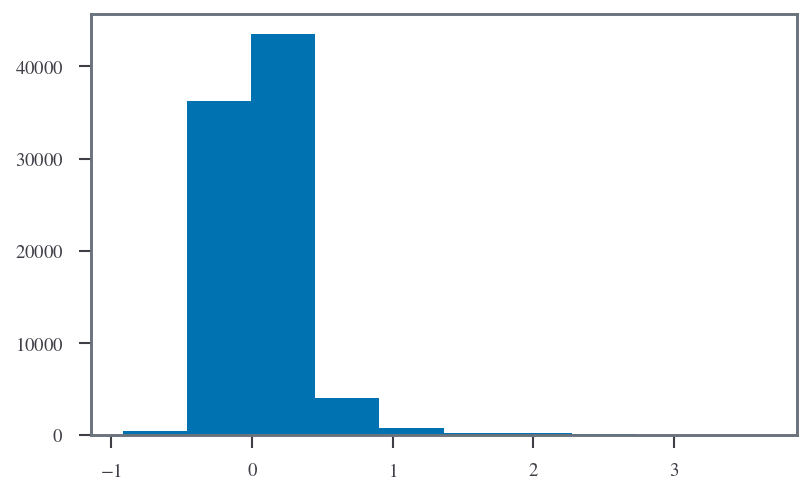

In [135]:
plt.hist(timeseries_height_ds().zeta.values.ravel())

In [130]:
import imageio
from sithom.plot import lim, plot_defaults

plot_defaults()


def animate_height_timeseries(ds: xr.Dataset, output_path: str) -> None:
    output_path = os.path.join(FIGURE_PATH, output_path)
    plot_defaults()
    vmin, vmax = lim(ds.zeta.values, percentile=0, balance=True)
    vmin, vmax = np.min([-vmax, vmin]), np.max([-vmin, vmax])
    levels = np.linspace(vmin, vmax, num=400)
    cbar_levels = np.linspace(vmin, vmax, num=7)
    
    if not os.path.exists(output_path):
        os.mkdir(output_path)

    def plot_part(num: int = 125) -> None:
        plt.tricontourf(ds.lon.values, 
                        ds.lat.values, 
                        ds.mesh.values, 
                        ds.zeta.values[num], 
                        vmin=vmin, 
                        vmax=vmax,
                        levels=levels, 
                        cmap="cmo.balance")
        cbar = plt.colorbar(label="Height [m]")
        cbar.set_ticks(cbar_levels)
        cbar.set_ticklabels(["{:.2f}".format(x) for x in cbar_levels.tolist()])

        plt.xlabel("Longitude [$^{\circ}$E]")
        plt.ylabel("Latitude [$^{\circ}$N]")
        time = ds.isel(time=num).time.values
        ts = pd.to_datetime(str(time)) 
        plt.title(ts.strftime('%Y-%m-%d %H:%M'))
        plt.savefig(os.path.join(output_path, str(num) + ".png"))
        plt.clf()

    for i in range(len(ds.time.values)):
        plot_part(i)
        
    fig_paths = [os.path.join(output_path, str(num) + ".png") for num in range(len(ds.time.values))]
    ims = [imageio.imread(f) for f in fig_paths]
    imageio.mimwrite(output_path + ".gif", ims)


In [126]:
lim(ds.zeta.values, percentile=0.2, balance=True)

(-0.6631635081286807, 2.285310000304395)

In [140]:
from src.constants import DATA_PATH


def trim_and_animate(path_in: str, path_out: str) -> None:
    path_in = os.path.join(DATA_PATH, path_in)
    ds = timeseries_height_ds(path=path_in)
    animate_height_timeseries(ds.sel(time=slice("2005-08-27", "2005-08-31")), path_out)


trim_and_animate("kate_h08", "katrina_hit5")

/var/folders/q5/n7rv_91d6b58cbb5xkzlsc4c0000gn/T/ipykernel_79592/2385157597.py:53: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ims = [imageio.imread(f) for f in fig_paths]


<Figure size 826.772x510.973 with 0 Axes>

In [138]:
os.listdir(DATA_PATH)

['6D_search',
 'sea_surface_temperature.nc',
 'mult3.25',
 'exp_h80',
 'kat_emulation',
 'katex-0.nc',
 'emulation_angle_pos_matern32_variance',
 'kat_xn',
 'katrina-0.nc',
 'mean_sea_level_pressure.nc',
 'kat_rmax',
 'katrina_water_era5.nc',
 'mult0.5',
 'fort.224.nc',
 'significant_height_of_combined_wind_waves_and_swell.nc',
 'emu_ex',
 'katrina_example_input.nc',
 '.DS_Store',
 'Test',
 'mult2.25',
 'emulation_angle_pos_poi',
 'fort.221.nc',
 'IBTrACS.ALL.v04r00.nc',
 'katrina-1.nc',
 'katrina_tides.nc',
 'katex.fort.221',
 'katrina_era5.nc',
 'kat_move_smeared',
 'emulation_angle_pos_mves',
 'katd_h08',
 'lhc',
 'mult1.75',
 'mult1',
 'emu2_ex',
 'mult3.5',
 'kate_h08',
 'mult0.75',
 '6D_Search_Holdout',
 'fort.218',
 'emu3_ex',
 'kat_pc',
 'kat_angle',
 '10m_v_component_of_wind.nc',
 'emu_angle_position',
 'total_precipitation.nc',
 'fort.221',
 'emulation_angle_pos_Mattern52',
 '6DSearch',
 'fort.217',
 'emulation_angle_pos_big',
 'mult3.75',
 'README.md',
 'IBTrACS_gom_landings

In [131]:
animate_height_timeseries(ds.sel(time=slice("2005-08-27", "2005-08-31")), "katrina_hit4")

/var/folders/q5/n7rv_91d6b58cbb5xkzlsc4c0000gn/T/ipykernel_79592/2385157597.py:53: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ims = [imageio.imread(f) for f in fig_paths]


<Figure size 826.772x510.973 with 0 Axes>

In [101]:
np.any(np.isnan(ds.zeta.values))

False

In [102]:
ds.zeta.max()

<xarray.DataArray 'zeta' ()>
array(3.64693343)

(array([8.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 8.542e+04]),
 array([-9.99990000e+04, -8.99987353e+04, -7.99984706e+04, -6.99982059e+04,
        -5.99979412e+04, -4.99976765e+04, -3.99974118e+04, -2.99971471e+04,
        -1.99968825e+04, -9.99661776e+03,  3.64693343e+00]),
 <BarContainer object of 10 artists>)

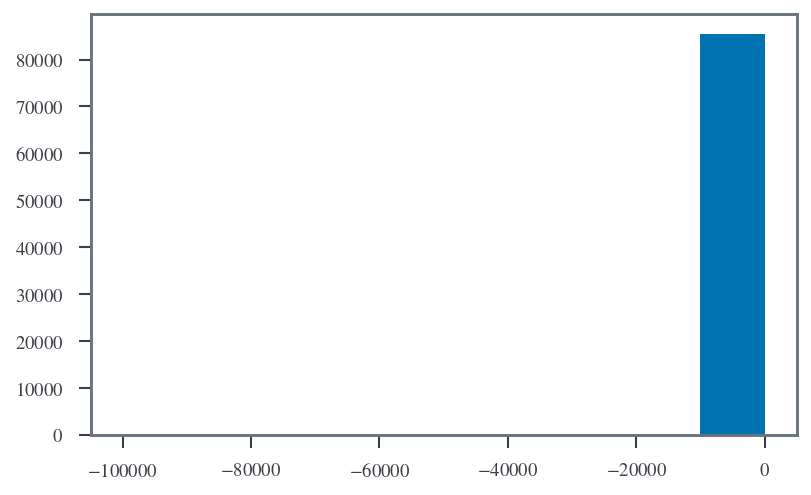

In [104]:
plt.hist(ds.zeta.values.ravel())

In [108]:
ds.zeta.values[ds.zeta.values == -99999.0] = 0

(array([3.7400e+02, 3.6269e+04, 4.3514e+04, 3.9930e+03, 6.9900e+02,
        2.4800e+02, 1.5700e+02, 1.2000e+02, 4.3000e+01, 1.1000e+01]),
 array([-0.92      , -0.46330666, -0.00661331,  0.45008003,  0.90677337,
         1.36346672,  1.82016006,  2.2768534 ,  2.73354674,  3.19024009,
         3.64693343]),
 <BarContainer object of 10 artists>)

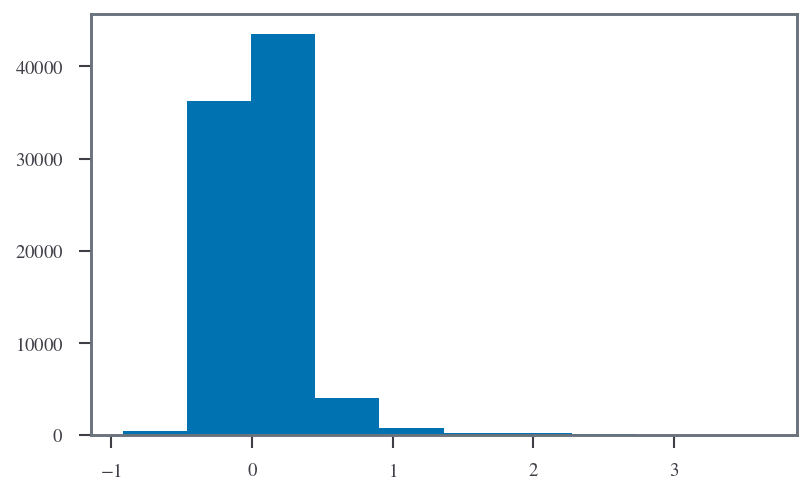

In [109]:
plt.hist(ds.zeta.values.ravel())

In [111]:
ds.sel(time=slice("2005-08-27", "2005-08-31"))

<xarray.Dataset>
Dimensions:  (time: 90, point: 339, triangle: 558, vertex: 3)
Coordinates:
    lon      (point) float64 -90.2 -90.32 -90.35 -90.26 ... -87.1 -87.61 -88.01
    lat      (point) float64 30.03 30.12 30.25 30.35 ... 27.11 27.52 27.37 27.08
  * time     (time) datetime64[ns] 2005-08-27T01:00:00 ... 2005-08-31T23:40:00
Dimensions without coordinates: point, triangle, vertex
Data variables:
    zeta     (time, point) float64 0.07869 0.08411 0.08003 ... -0.2335 -0.2303
    mesh     (triangle, vertex) int64 42 66 41 245 256 ... 302 284 286 304 302

In [116]:
time = ds.isel(time=0).time.values


IndexError: invalid index to scalar variable.

In [117]:
time

numpy.datetime64('2005-08-19T05:00:00.000000000')